<a href="https://colab.research.google.com/github/ferdinand1810/Metodos_Numericos_Aplicados_Ingenieria_UTEC/blob/main/Actividad_Aprendizaje_Contextualizada_MN_UTEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad de Aprendizaje Contextualizada**

Contexto:
 En el diseño de un sistema de suspensión para un vehículo todoterreno, un ingeniero mecánico necesita modelar el comportamiento de un resorte sometido a diferentes cargas. Los datos experimentales obtenidos del alargamiento del resorte frente a la fuerza aplicada presentan cierta dispersión debido al ruido experimental. Para predecir el alargamiento en valores no medidos y optimizar el diseño, se decide aplicar interpolación polinomial para aproximar la función que describe el fenómeno físico.

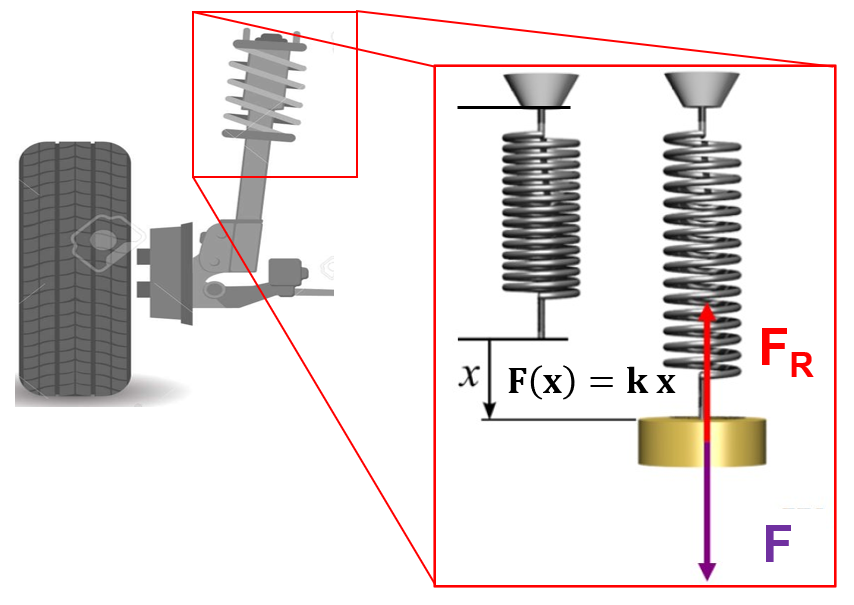

Figura 1. Esquema del sistema de suspensión de un vehiculo todoterreno.

**Preguntas de Análisis**

**1. Comprensión de los elementos fundamentales**

 *¿Qué características del fenómeno físico (alargamiento del resorte frente a la fuerza) justifican el uso de interpolación polinomial frente a otros métodos de ajuste? Describe los supuestos que se deben cumplir para que la interpolación polinomial sea una herramienta válida en este caso*

Rpta.

El fenómeno físico que gobierna en los alargamientos de los resortes esta descrita en su mayoria por "La ley de Hooke" que establece que cuando se aplica una fuerza a un resorte construido con mate-
rial uniforme, la longitud del resorte es una función lineal de esa fuerza.

De la figura 1, se tiene que la función lineal esta dado por:

${F(x) = k(x)}$   .... (1)

donde:
${F(x)}$ es la fuerza requerida para estirar el resorte ${x}$ unidades,  ${L}$ es la longitud del resorte sin fuerza aplicada y la constante k es la constante del resorte.

Se usa *interpolación polinomial* para modelar el alargamiento del resorte porque:

Sigue la **Ley De Hooke**. Segun la ecuación (1) se evidencia que existe una relación continua, suavemente creciente entre la fuerza aplicada ${F(x)}$
F y el alargamiento ${x}$. Aunque es comun que en los experimentos exista ruido u otros fenomenos dificil de medir, la tendencia de los puntos tomados en laboratorio deberian seguir una función lineal, ya que la formulación propuesta por Hooke es lineal. Caso contrario, los datos tomados en experimiento estarian mal.

Los supuestos que **deben cumplirse** para que la interpolación polinomial sea válida son:

a) *La función sea continua*. No debe haber saltos, discontinuidades o comportamientos bruscos en la relación  $({x}= f(F))$.

${x = \frac{F}{k}}$


Es decir, existe una relación continua, suavemente creciente entre la fuerza aplicada ${𝐹}$ y el alargamiento ${x}$.

b) *Los datos no deberian tener ruido excesivo*. Los datos tomado en el experimento que presenten "ruido experimental" no deben ser muy bruscos ni mucho menos deberian ser dispersos.

c) La cantidad de datos de entrada (condiciones de borde de entrada ${x}$) deberian los razonable y justos y deben ser distribuidos razonablemente. Polinomios de alto grado con demasiados datos pueden generar oscilaciones no deseadas.





In [ ]:
## Pregunta 2

**2 Implementación de algoritmos**

 *Diseña un algoritmo que permita aplicar interpolación de Lagrange a un conjunto de 5 puntos experimentales obtenidos del sistema de suspensión. ¿Cómo asegurarías que el algoritmo sea eficiente y que minimice el error de redondeo numérico?*

Algoritmo de Lagrange del polinomnio para resolver las deformaciones:

${P(x) = {\sum_{j=0}^{n}} F_{j}.L_{j}(x)}$

donde los polinomios base son:

${L_{j}(x) = \prod_{0\le m\le n
}^{m\neq j} {\frac{(x - x_m)}{(x_j - x_m)}}}$

Donde:

${x_j}$ son las deformaciones conocidas (provienen de los datos experimentales.

${F_j}$ es la fuerza aplicada.

${x}$ son las deformaciones a estimar.

${P(x)}$ es la fuerza estimada por interpolación


In [ ]:
## Pregunta 3

**3. Aplicación práctica de conceptos teóricos**

 A partir de los siguientes datos experimentales:

Fuerza (N): [100, 200, 300, 400, 500]

Alargamiento (mm): [5.2, 10.1, 15.3, 20.0, 25.4]
 Aplica la interpolación polinomial para estimar el alargamiento cuando la fuerza aplicada sea de 350 N. Interpreta el resultado obtenido y discute su validez en el contexto del fenómeno físico.


Resolviendo manualmente:

A continuación se presenta un pequeño paso de como se resolveria esto manualmente. Mayor detalle ejecutar el script de abajo para una mejor lectura.

${L_{0}(17.5)}$

${L_{0} = \frac{(17.5-10.1)(17.5-15.3)(17.5-20.0)(17.5-25.4)}{(5.2-10.1)(5.2-15.3)(5.2-20.0)(5.2-25.4)}}$

${L_{0} = \frac{(321.53)}{(14 797.53)} \simeq 0.02173}$

${F_0 . L_0 = 100 x 0.02173 = 2.173}$

In [7]:
######## Script para estimar la Fuerza usando la Interpolación de Lagrangec #####
# Curso: Metodos Numericos Aplicado a la Ingenieria - UTEC

def lagrange_interpolation_explicada(x_data, F_data, x_eval):
    n = len(x_data)
    resultado = 0.0

    print(f"\n🧪 Estimación de la fuerza usando el metodo de la interpolación de Lagrange")
    print(f"🔍 Evaluando en x = {x_eval} mm de deformación\n")

    for j in range(n):
        print(f"🔹 Paso {j + 1}: Usando el punto (x = {x_data[j]}, F = {F_data[j]})")
        L_j = 1.0

        for m in range(n):
            if m != j:
                numerador = x_eval - x_data[m]
                denominador = x_data[j] - x_data[m]
                cociente = numerador / denominador
                L_j *= cociente
                print(f"   ➤ Calculando: ({x_eval} - {x_data[m]}) / ({x_data[j]} - {x_data[m]}) = {cociente:.6f}")

        termino = F_data[j] * L_j
        resultado += termino
        print(f"   ✅ L_{j}(x) = {L_j:.6f}")
        print(f"   🧩 Término aportado: F * L = {F_data[j]} * {L_j:.6f} = {termino:.6f}\n")

    print("🧾 Cálculo completado.")
    print(f"📌 Fuerza estimada para una deformación de {x_eval} mm: **{resultado:.4f} N**\n")
    return resultado

# Datos experimentales
x = [5.2, 10.1, 15.3, 20.0, 25.4]      # Deformación (mm)
F = [100, 200, 300, 400, 500]          # Fuerza (N)

# Deformación objetivo
x_objetivo = 17.5

# Ejecutamos la función paso a paso
F_estimada = lagrange_interpolation_explicada(x, F, x_objetivo)


🧪 Estimación de la fuerza usando interpolación de Lagrange
🔍 Evaluando en x = 17.5 mm de deformación

🔹 Paso 1: Usando el punto (x = 5.2, F = 100)
   ➤ Calculando: (17.5 - 10.1) / (5.2 - 10.1) = -1.510204
   ➤ Calculando: (17.5 - 15.3) / (5.2 - 15.3) = -0.217822
   ➤ Calculando: (17.5 - 20.0) / (5.2 - 20.0) = 0.168919
   ➤ Calculando: (17.5 - 25.4) / (5.2 - 25.4) = 0.391089
   ✅ L_0(x) = 0.021732
   🧩 Término aportado: F * L = 100 * 0.021732 = 2.173156

🔹 Paso 2: Usando el punto (x = 10.1, F = 200)
   ➤ Calculando: (17.5 - 5.2) / (10.1 - 5.2) = 2.510204
   ➤ Calculando: (17.5 - 15.3) / (10.1 - 15.3) = -0.423077
   ➤ Calculando: (17.5 - 20.0) / (10.1 - 20.0) = 0.252525
   ➤ Calculando: (17.5 - 25.4) / (10.1 - 25.4) = 0.516340
   ✅ L_1(x) = -0.138474
   🧩 Término aportado: F * L = 200 * -0.138474 = -27.694839

🔹 Paso 3: Usando el punto (x = 15.3, F = 300)
   ➤ Calculando: (17.5 - 5.2) / (15.3 - 5.2) = 1.217822
   ➤ Calculando: (17.5 - 10.1) / (15.3 - 10.1) = 1.423077
   ➤ Calculando: (1

In [ ]:
# Practica 4

**4. Análisis crítico y reflexión**

 *¿Qué limitaciones podría presentar el uso de interpolación polinomial para modelar datos experimentales en sistemas mecánicos reales? Compara este enfoque con otros métodos como el ajuste por mínimos cuadrados o el uso de splines, y argumenta en qué situaciones sería más conveniente cada uno.*

 Las limitaciones que se presentarian son:
  - Inestabilidad Numérica.- Los ajustes por redondeo (bajas las cifras significativas) puede generar errores computacionales.

  - Las mediciones humanas generan errores. Un pequeño error experimental en la toma de datos o procesamientos en uno de los puntos puede provocar grandes desviaciones en todo el polinomio.

 La interpolacion de Lagrange con otros metodos, presenta desventajas con otros metodos de interpolación. Por ejemplo el metodo de **Mínimos Cuadrados** permite un modelo de grado bajo que minimiza el error global, lo cual reduce el sobreajuste. Es robusto al ruido y a datos experimentales inconsistentes.

 Otro metodo es la **Interpolación con splines** usa polinomios por tramos con continuidad de derivadas entre ellos, lo que garantiza suavidad y realismo físico.


Finalmente, El uso de interpolación polinomial de Lagrange es útil para casos simples y con poca data experimental y del prototipo, donde se requiere exactitud puntual y se cuente con datos confiables. Sin embargo, no es la mejor opción para modelar fenómenos físicos reales con ruido y sistemas no lineales. Ante esto existen otros metodos robustos para modelar fenomenos físicos con un ajuste mejor tales como el **Ajuste por Minimos Cuadrados** y **Interpolación con splines**.
